In [1]:
#import python packages/libraries 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
#read in data from csv file and convert to data frame
df_loan_dataset = pd.read_csv('/Users/liamoleary/GitHub/Data/lending_club_loan_dataset.csv')

#print top 2 lines of dataframe 
print(df_loan_dataset.head(2))

         id grade  annual_inc  short_emp  emp_length_num home_ownership  \
0  11454641     A      100000          1               1           RENT   
1   9604874     A       83000          0               4            OWN   

     dti      purpose        term  last_delinq_none  last_major_derog_none  \
0  26.27  credit_card   36 months                 1                    NaN   
1   5.39  credit_card   36 months                 0                    NaN   

   revol_util  total_rec_late_fee  od_ratio  bad_loan  
0        43.2                 0.0  0.160624         0  
1        21.5                 0.0  0.810777         0  


In [4]:
#print info on dataset 
print(df_loan_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  int64  
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [6]:
#shape of the dataset
print(df_loan_dataset.shape)

(20000, 15)


In [7]:
df_loan_dataset_1 = df_loan_dataset.drop_duplicates(keep='first')
print(df_loan_dataset_1.shape)

#this indicates there are no duplicates in our dataset 

(20000, 15)


In [30]:
#summary statistics for dataset (numeric variables)
df_loan_dataset.describe().round(1)

#identify outliers, missing values etc 


,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,20000.0,20000.0,20000.0,20000.0,19846.0,20000.0,574.0,20000.0,20000.0,20000.0,20000.0
mean,7590662.1,73349.6,0.1,6.8,16.6,0.5,0.8,56.0,0.3,0.5,0.2
std,1609593.3,45198.6,0.3,3.8,7.6,0.5,0.4,42.1,3.1,0.3,0.4
min,586040.0,8412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,6206282.8,47000.0,0.0,3.0,10.9,0.0,1.0,38.8,0.0,0.3,0.0
50%,7378896.5,65000.0,0.0,7.0,16.2,1.0,1.0,57.1,0.0,0.5,0.0
75%,8766234.8,88000.0,0.0,11.0,22.1,1.0,1.0,73.9,0.0,0.8,0.0
max,11454641.0,1000000.0,1.0,11.0,35.0,1.0,1.0,5010.0,96.5,1.0,1.0


In [31]:
# summary of characteristics of non-numeric variables
df_loan_dataset.describe(include=[np.object])

/var/folders/k3/46_t4z7174qbg9yzk8mh2kpm0000gn/T/ipykernel_3084/297930248.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_loan_dataset.describe(include=[np.object])


,grade,home_ownership,purpose,term
count,20000,18509,20000,20000
unique,7,3,12,3
top,B,MORTGAGE,debt_consolidation,36 months
freq,6042,9844,12337,14969


(array([  26.,    9.,   64.,  124., 3806., 5031., 3999., 4128., 1311.,
        1502.]),
 array([  586040. ,  1672900.1,  2759760.2,  3846620.3,  4933480.4,
         6020340.5,  7107200.6,  8194060.7,  9280920.8, 10367780.9,
        11454641. ]),
 <BarContainer object of 10 artists>)

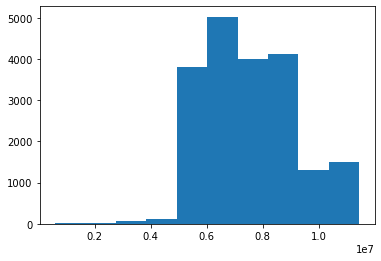

In [13]:
#histogram id
num_bins=10
plt.hist(df_loan_dataset['id'],num_bins)

(array([1.7276e+04, 2.4640e+03, 1.8800e+02, 4.3000e+01, 1.0000e+01,
        6.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 4.0000e+00]),
 array([   8412. ,  107570.8,  206729.6,  305888.4,  405047.2,  504206. ,
         603364.8,  702523.6,  801682.4,  900841.2, 1000000. ]),
 <BarContainer object of 10 artists>)

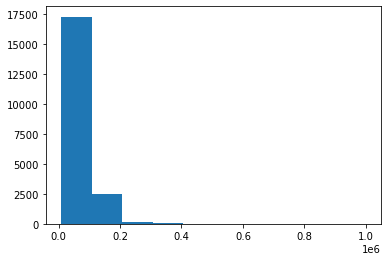

In [15]:
#histogram annual_inc
num_bins=10
plt.hist(df_loan_dataset['annual_inc'],num_bins)

(array([17750.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2250.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

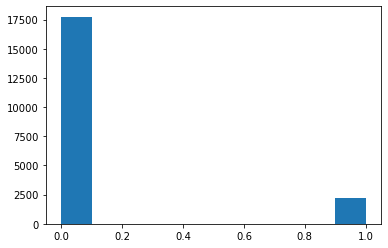

In [14]:
#histogram short_emp
num_bins=10
plt.hist(df_loan_dataset['short_emp'],num_bins)

(array([2250., 1227., 1732., 1501., 1026., 1405., 1246., 1316.,  989.,
        7308.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

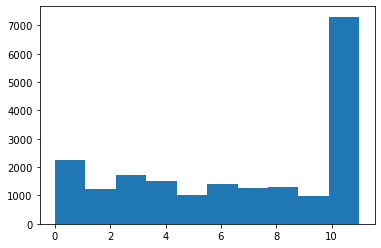

In [16]:
#histogram 
num_bins=10
plt.hist(df_loan_dataset['emp_length_num'],num_bins)

(array([ 573., 1545., 2529., 3172., 3317., 2978., 2372., 1729., 1090.,
         541.]),
 array([ 0.   ,  3.499,  6.998, 10.497, 13.996, 17.495, 20.994, 24.493,
        27.992, 31.491, 34.99 ]),
 <BarContainer object of 10 artists>)

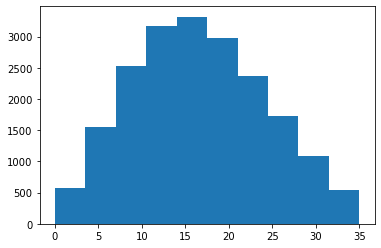

In [17]:
#histogram dti
num_bins=10
plt.hist(df_loan_dataset['dti'],num_bins)

(array([ 9068.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10932.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

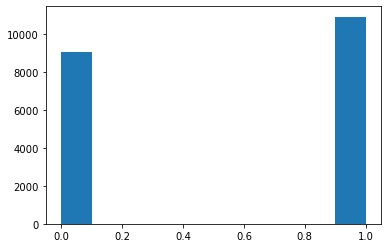

In [23]:
#histogram last_delinq_none
num_bins=10
plt.hist(df_loan_dataset['last_delinq_none'],num_bins)

(array([138.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 436.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

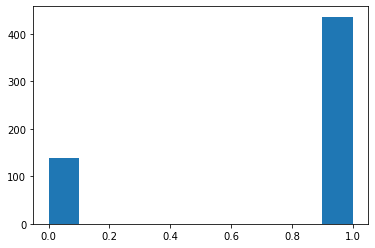

In [24]:
#histogram last_major_derog_none
num_bins=10
plt.hist(df_loan_dataset['last_major_derog_none'],num_bins)

(array([1.9999e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.,  501., 1002., 1503., 2004., 2505., 3006., 3507., 4008.,
        4509., 5010.]),
 <BarContainer object of 10 artists>)

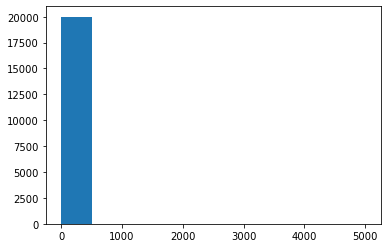

In [25]:
#histogram revol_util
num_bins=10
plt.hist(df_loan_dataset['revol_util'],num_bins)

(array([1.9773e+04, 1.1100e+02, 3.7000e+01, 5.1000e+01, 1.0000e+01,
        9.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([ 0.     ,  9.64666, 19.29332, 28.93998, 38.58664, 48.2333 ,
        57.87996, 67.52662, 77.17328, 86.81994, 96.4666 ]),
 <BarContainer object of 10 artists>)

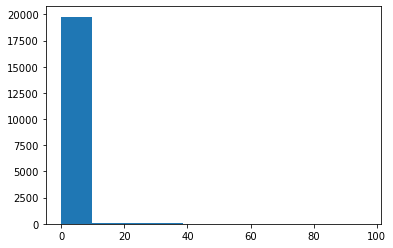

In [26]:
#histogram total_rec_late_fee
num_bins=10
plt.hist(df_loan_dataset['total_rec_late_fee'],num_bins)

(array([1912., 1981., 1963., 2015., 1987., 2036., 2010., 2036., 2043.,
        2017.]),
 array([7.65000000e-05, 1.00058223e-01, 2.00039946e-01, 3.00021668e-01,
        4.00003391e-01, 4.99985114e-01, 5.99966837e-01, 6.99948560e-01,
        7.99930282e-01, 8.99912005e-01, 9.99893728e-01]),
 <BarContainer object of 10 artists>)

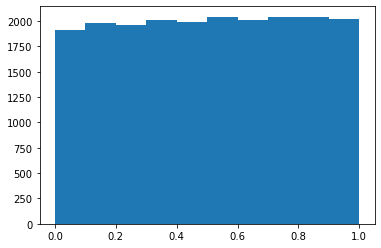

In [27]:
#histogram od_ratio
num_bins=10
plt.hist(df_loan_dataset['od_ratio'],num_bins)

(array([16000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

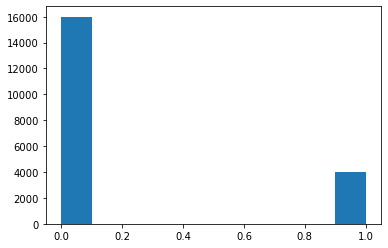

In [28]:
#histogram bad_loan
num_bins=10
plt.hist(df_loan_dataset['bad_loan'],num_bins)

In [ ]:
#probability density function
sns.distplot(df_loan_dataset['annual_inc'],bins=10)

In [ ]:
# print(df_loan_dataset.head(10))

#EDA - Look at the data 
#Get an idea of the data to understand outliers and missing data etc 
#Clean data 
    #drop columns - this can be done once we understand which features we want to keep 
    #drop duplicate data 
#Re-do EDA 

print(df_loan_dataset.columns)


df_loan_dataset['annual_inc'].hist()
plt.show()